# The pendulum

<img src="pendulum.png">

Equations of Motion

\begin{eqnarray*}
\frac{d \theta}{dt} =& \omega \\
\frac{d \omega}{dt} =& - \frac{g}{l} sin (\theta)
\end{eqnarray*}

# Modes of motion of a pendulum

In [1]:
from IPython.display import Video

In [4]:
Video("pendulum_positions.mp4", width=800, height=400)

In [3]:
Video("pendulum_phase_space.mp4", width=800, height=400)

# Phase space portrait

In [138]:
%matplotlib inline

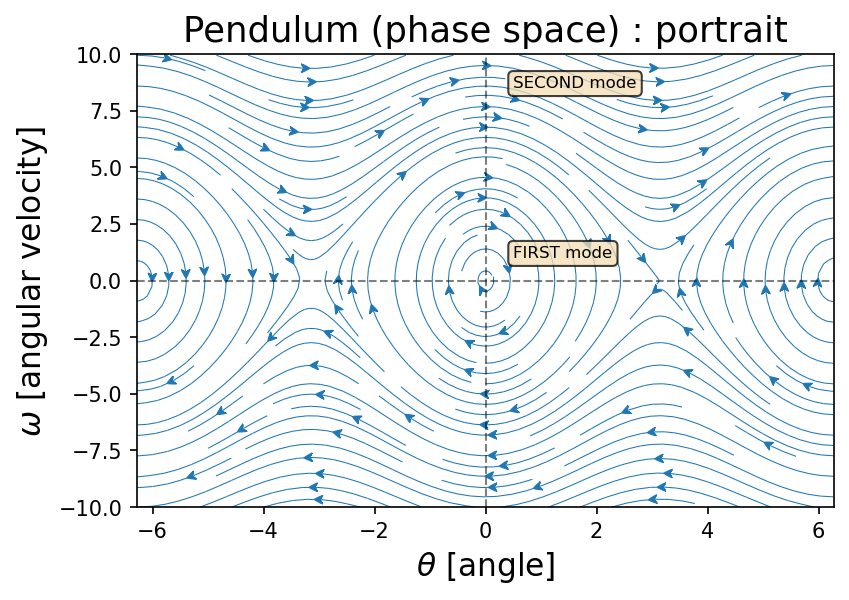

In [125]:
import pylab
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,dpi=150)

# system parameters
mass, gravity, length = [1.0, 9.81, 1.0]
PARAMETERS = (mass, gravity, length)

# phase space grid
theta_values = np.arange(-2*np.pi, 2*np.pi, 0.05)
omega_values = np.arange(-10, 10, 0.05) 
THETA, OMEGA = np.meshgrid(theta_values, omega_values)

# equations of motion
v_theta = OMEGA
v_omega = -gravity/length*np.sin(THETA)

# plot streamlines
pylab.streamplot(THETA, OMEGA, v_theta, v_omega, density=1.5, cmap="Blues", linewidth=0.5, arrowstyle='fancy')

# reference lines
ax.plot((-2*np.pi, 2*np.pi),(0,0),color="black",lw=1,linestyle="--",alpha=0.5)
ax.plot((0,0),(-10,10),color="black",lw=1,linestyle="--",alpha=0.5)

# text labels
props = dict(boxstyle='round', facecolor='wheat', alpha=0.75)
ax.text(0.5, 1,"FIRST mode",bbox = props, fontsize=8)
ax.text(0.5, 8.5,"SECOND mode",bbox = props, fontsize=8)

# customise plot
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-10,10)
ax.set_xlabel("$\\theta$ [angle]", fontsize=15)
ax.set_ylabel("$\omega$ [angular velocity]", fontsize=15)
ax.set_title("Pendulum (phase space) : portrait", fontsize=17)
ax.grid(False)

plt.show()

# Lagrangian Descriptor

## Set equations of motion (vector field)

In [27]:
import numpy as np

def pendulum_vector_field(t, u, PARAMETERS = [1.0, 9.81, 1.0]):
    # unpack state variables
    x, p_x = u.T
    
    # system parameters
    mass, gravity, length = PARAMETERS
    
    # vector field components
    v_x   =  p_x / length**2
    v_p_x = -gravity*length*np.sin(x)
    v = np.column_stack([
        v_x, 
        v_p_x
    ])
    
    # output vector field
    return v

In [28]:
vector_field = pendulum_vector_field

## Define visualisation grid

In [29]:
# theta axis limits
ax1_min, ax1_max = [-2*np.pi, 2*np.pi] 

# p_theta axis limits
ax2_min, ax2_max = [-10, 10] 

# Number of points per axis
N1, N2 = [300, 300] 

grid_parameters = [(ax1_min, ax1_max, N1), (ax2_min, ax2_max, N2)]

## Set integration parameters of Lagrangian descriptor

In [30]:
# Integration parameters
tau = 12

# LDp, p-value
p_value = 0.5

## Compute Lagrangian descriptor

In [31]:
from ldds.base import compute_lagrangian_descriptor

In [32]:
LD = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)

## Visualise Lagrangian descriptor

In [33]:
from ldds.tools import draw_all_lds

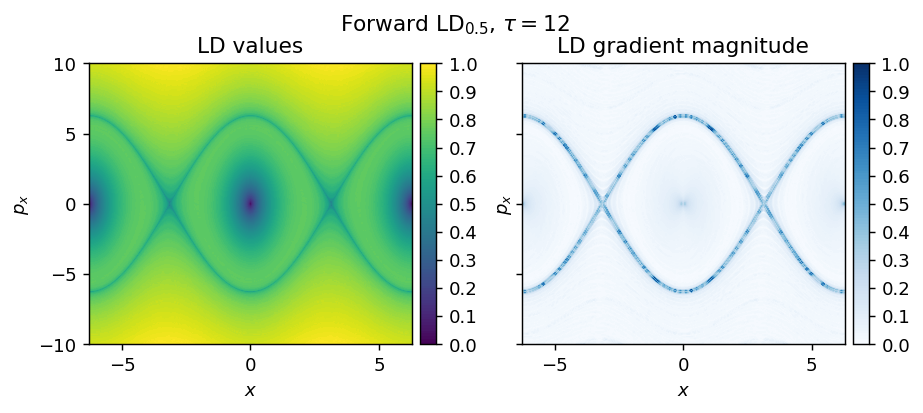

In [34]:
figs = draw_all_lds(LD, [], grid_parameters, tau, p_value)

## Customise plot

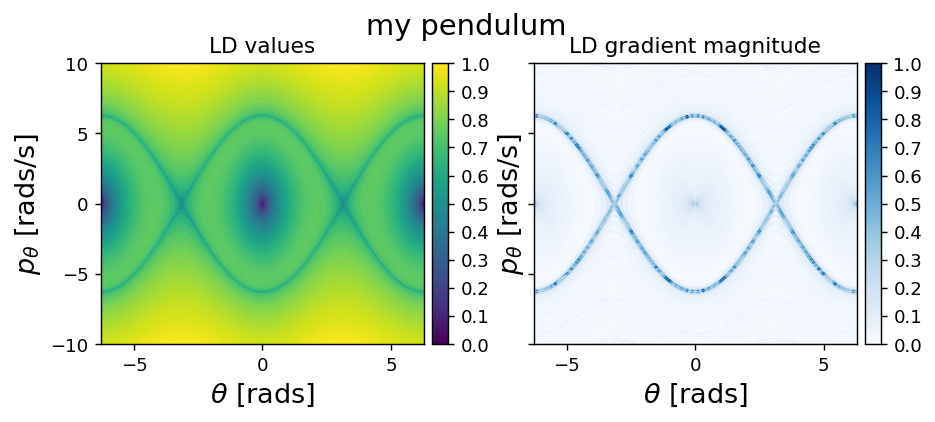

In [35]:
# choose LD forwards subplots
fig, ax = figs[0]

# set new axes labels
ax[0].set_xlabel(r"$\theta$ [rads]", fontsize=15)
ax[0].set_ylabel(r"$p_\theta$ [rads/s]", fontsize=15)

ax[1].set_xlabel(r"$\theta$ [rads]", fontsize=15)
ax[1].set_ylabel(r"$p_\theta$ [rads/s]", fontsize=15)

# set new super-title
suptitle = "my pendulum"
fig.suptitle(suptitle, fontsize=16)

# visualise
fig

## Putting all together

In [50]:
from scipy.ndimage import laplace
from numpy.ma import masked_where
from numpy.ma import masked_array

def LD_laplace_filter(LD, tolerance):
    LD_laplacian = laplace(LD)
    #process laplacian 
    LD_laplacian = LD_laplacian/np.max(LD_laplacian)
    LD_laplacian = LD_laplacian**2
    #mask values according to threshold
    LD_laplacian = masked_where(LD_laplacian < tolerance, LD_laplacian)
    
    return LD_laplacian

In [139]:
%matplotlib inline

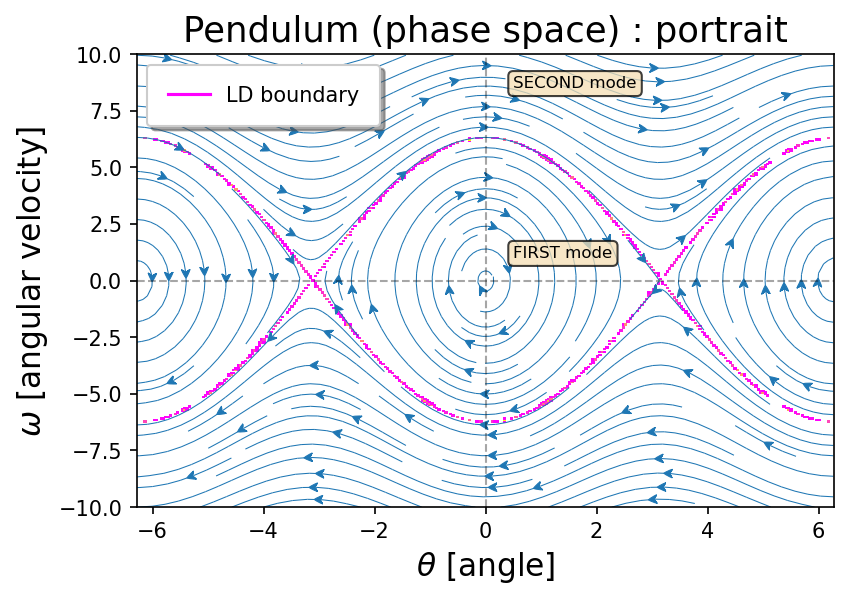

In [140]:
import pylab
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,dpi=150)

# system parameters
mass, gravity, length = [1.0, 9.81, 1.0]
PARAMETERS = (mass, gravity, length)

# phase space grid
theta_values = np.arange(-2*np.pi, 2*np.pi, 0.05)
omega_values = np.arange(-10, 10, 0.05) 
THETA, OMEGA = np.meshgrid(theta_values, omega_values)

# equations of motion
v_theta = OMEGA
v_omega = -gravity/length*np.sin(THETA)

# plot streamlines
pylab.streamplot(THETA, OMEGA, v_theta, v_omega, 
                 density=1.5, cmap="Blues", linewidth=0.5, 
                 arrowstyle='fancy')

# reference lines
ax.plot((-2*np.pi, 2*np.pi),(0,0),color="black",lw=1,linestyle="--",alpha=0.35)
ax.plot((0,0),(-10,10),color="black",lw=1,linestyle="--",alpha=0.35)

# Overlay separatrix from LD
tolerance = 0.03
LD_laplacian = LD_laplace_filter(LD, tolerance)
points_ax1 = np.linspace(*grid_parameters[0])
points_ax2 = np.linspace(*grid_parameters[1])
X, Y = np.meshgrid(points_ax1, points_ax2)
ax.pcolormesh(X,Y, LD_laplacian,cmap='spring',alpha=1)

# text labels
props = dict(boxstyle='round', facecolor='wheat', alpha=0.75)
ax.text(0.5, 1,"FIRST mode",bbox = props, fontsize=8)
ax.text(0.5, 8.5,"SECOND mode",bbox = props, fontsize=8)
ax.plot([],[],color="magenta",label="LD boundary")

# customise plot
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-10,10)
ax.set_xlabel("$\\theta$ [angle]", fontsize=15)
ax.set_ylabel("$\omega$ [angular velocity]", fontsize=15)
ax.set_title("Pendulum (phase space) : portrait", fontsize=17)
ax.grid(False)

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

# APPENDIX

## Make animation: Single pendulum

Animation simple pendulum: two modes of motion

In [137]:
%matplotlib notebook

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque

Define ODE system

In [32]:
def pendulum_ode(u, t, mass, gravity, length):
    theta, omega = u
    # system parameters
    m, g, L = mass, gravity, length
    # vector field defintion
    dudt = [omega, -(g/L)*np.sin(theta)]
    
    return dudt

Solve initial value problem

In [33]:
# intial state
# theta0 = np.pi/2
theta0 = np.pi/4
# omega0 = 5
omega0 = 0.0
u0 = [theta0, omega0]

# time integration parameters
dt = 0.002
t0, tf = (0, 10)
n_points = int((tf-t0)/dt)
t = np.linspace(t0, tf, n_points)

# system parameters
mass, gravity, length = [1.0, 9.81, 1.0]
PARAMETERS = (mass, gravity, length)

# solve ODE
solution = odeint(pendulum_ode, u0, t, args=PARAMETERS)
solution_theta, solution_omega = solution.T

# compute cartesian coordinates
solution_x = length*np.sin(solution_theta)
solution_y = -length*np.cos(solution_theta)

Animate pendulum solution

<IPython.core.display.Javascript object>


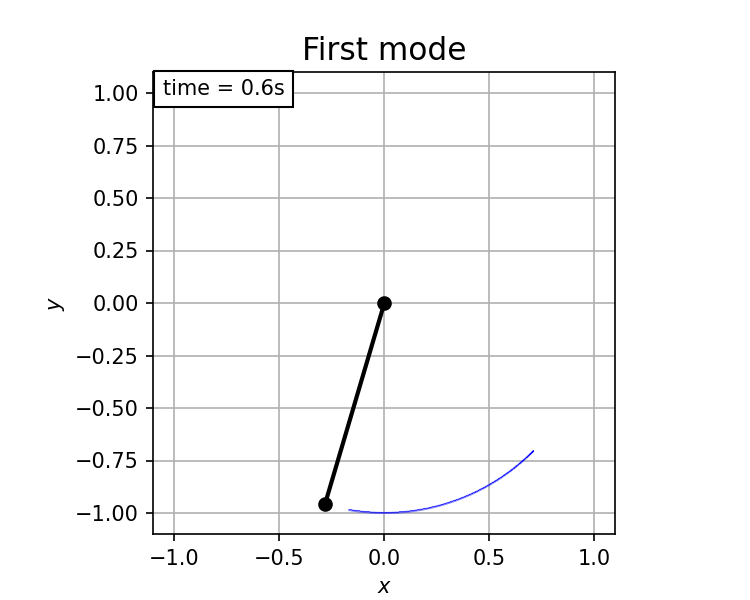

In [34]:
fig, ax = plt.subplots(1,1, figsize=(5, 4))

# Customise plot appearance
offset = 0.1*length
ax.set_xlim(-(length+offset), (length+offset))
ax.set_ylim(-(length+offset), (length+offset))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_aspect('equal')
ax.set_title("First mode", fontsize=15)
ax.grid()

line,  = ax.plot([], [], 'o-', color="black" , lw=2) # pendulum line
trace, = ax.plot([], [], ',-', color="blue", lw=1, alpha=0.5) # trajectory trace

time_template = 'time = %.1fs'
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black'))

history_len = 500  # how many trajectory points to display
history_x, history_y = deque(maxlen=history_len), deque(maxlen=history_len)


def animate(i):
    thisx = [0, solution_x[i]]
    thisy = [0, solution_y[i]]

    if i == 0:
        history_x.clear()
        history_y.clear()

    history_x.appendleft(thisx[1])
    history_y.appendleft(thisy[1])

    line.set_data(thisx, thisy)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % (i*dt))
    return line, trace, time_text


ani = animation.FuncAnimation(
    fig, animate, len(solution), interval=dt*1000, blit=True)
plt.show()

PHASE SPACE ANIMATION

<IPython.core.display.Javascript object>


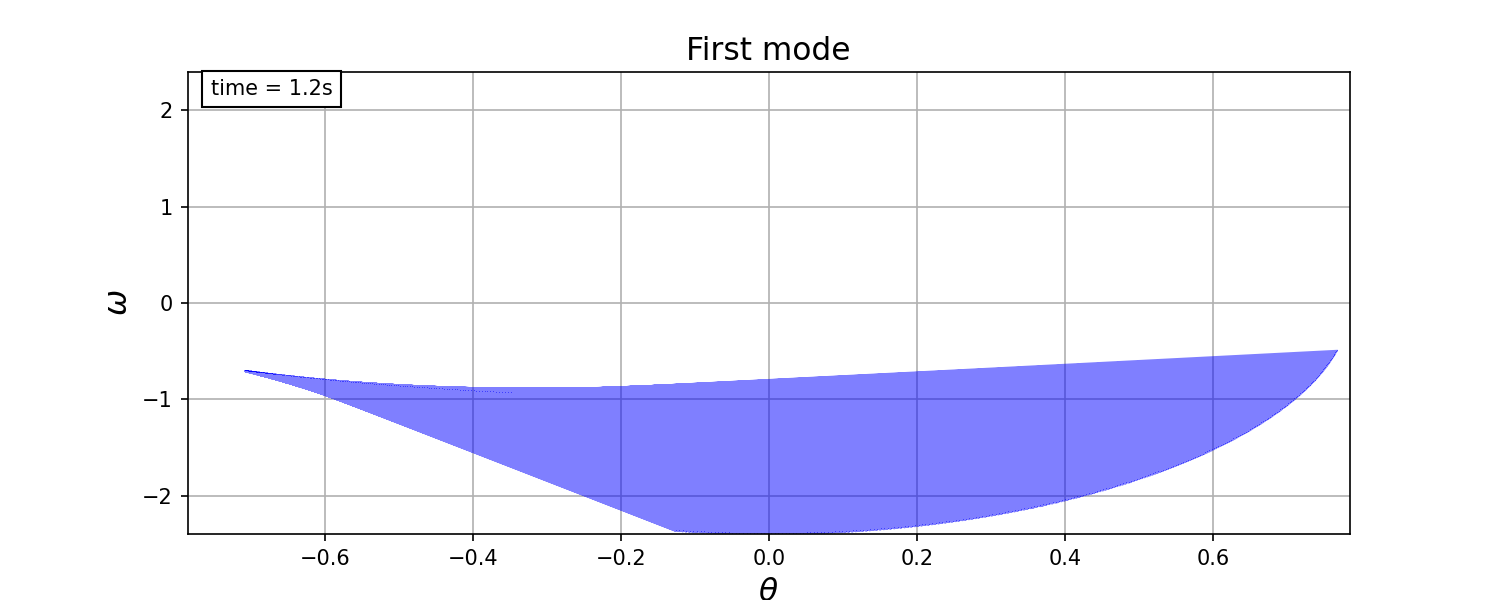

In [35]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))

# Customise plot appearance
offset = 0.1*length
ax.set_xlim(solution_theta.min(), solution_theta.max())
ax.set_ylim(solution_omega.min(), solution_omega.max())
ax.set_xlabel("$\\theta$", fontsize=15)
ax.set_ylabel("$\omega$" , fontsize=15)
# ax.set_aspect('equal')
ax.set_title("First mode", fontsize=15)
ax.grid()

# line,  = ax.plot([], [], 'o-', color="black" , lw=2) # pendulum line
trace, = ax.plot([], [], ',-', color="blue", lw=1, alpha=0.5) # trajectory trace

time_template = 'time = %.1fs'
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black'))

history_len = 500  # how many trajectory points to display
history_x, history_y = deque(maxlen=history_len), deque(maxlen=history_len)


def animate(i):
    thisx = [0, solution_theta[i]]
    thisy = [0, solution_omega[i]]

    if i == 0:
        history_x.clear()
        history_y.clear()

    history_x.appendleft(thisx[1])
    history_y.appendleft(thisy[1])

#     line.set_data(thisx, thisy)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % (i*dt))
    return trace, time_text


ani = animation.FuncAnimation(
    fig, animate, len(solution), interval=dt*1000, blit=True)
plt.show()

## Make animation: Two modes side to side

In [2]:
%matplotlib notebook

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque

Define ODE system

In [3]:
def pendulum_ode(u, t, mass, gravity, length):
    theta, omega = u
    # system parameters
    m, g, L = mass, gravity, length
    # vector field defintion
    dudt = [omega, -(g/L)*np.sin(theta)]
    
    return dudt

Solve initial value problem

In [4]:
# theta0 and omega0
mode1_u0 = (np.pi/4, 0.0)
mode2_u0 = (np.pi-0.1, 1.0)

In [5]:
# time integration parameters
dt = 0.002
t0, tf = (0, 5)
n_points = int((tf-t0)/dt)
t = np.linspace(t0, tf, n_points)

In [6]:
# system parameters
mass, gravity, length = [1.0, 9.81, 1.0]
PARAMETERS = (mass, gravity, length)

Solve initial value problem

In [7]:
solutions = []
for u0 in [mode1_u0, mode2_u0]:
    # solve ODE
    s = odeint(pendulum_ode, u0, t, args=PARAMETERS)
    solutions.append(s)

In [8]:
solution1_theta, solution1_omega = solutions[0].T
solution2_theta, solution2_omega = solutions[1].T

# compute cartesian coordinates
# MODE 1
solution1_x = length*np.sin(solution1_theta)
solution1_y = -length*np.cos(solution1_theta)
# MODE 2
solution2_x = length*np.sin(solution2_theta)
solution2_y = -length*np.cos(solution2_theta)

Animate pendulum solution

<IPython.core.display.Javascript object>


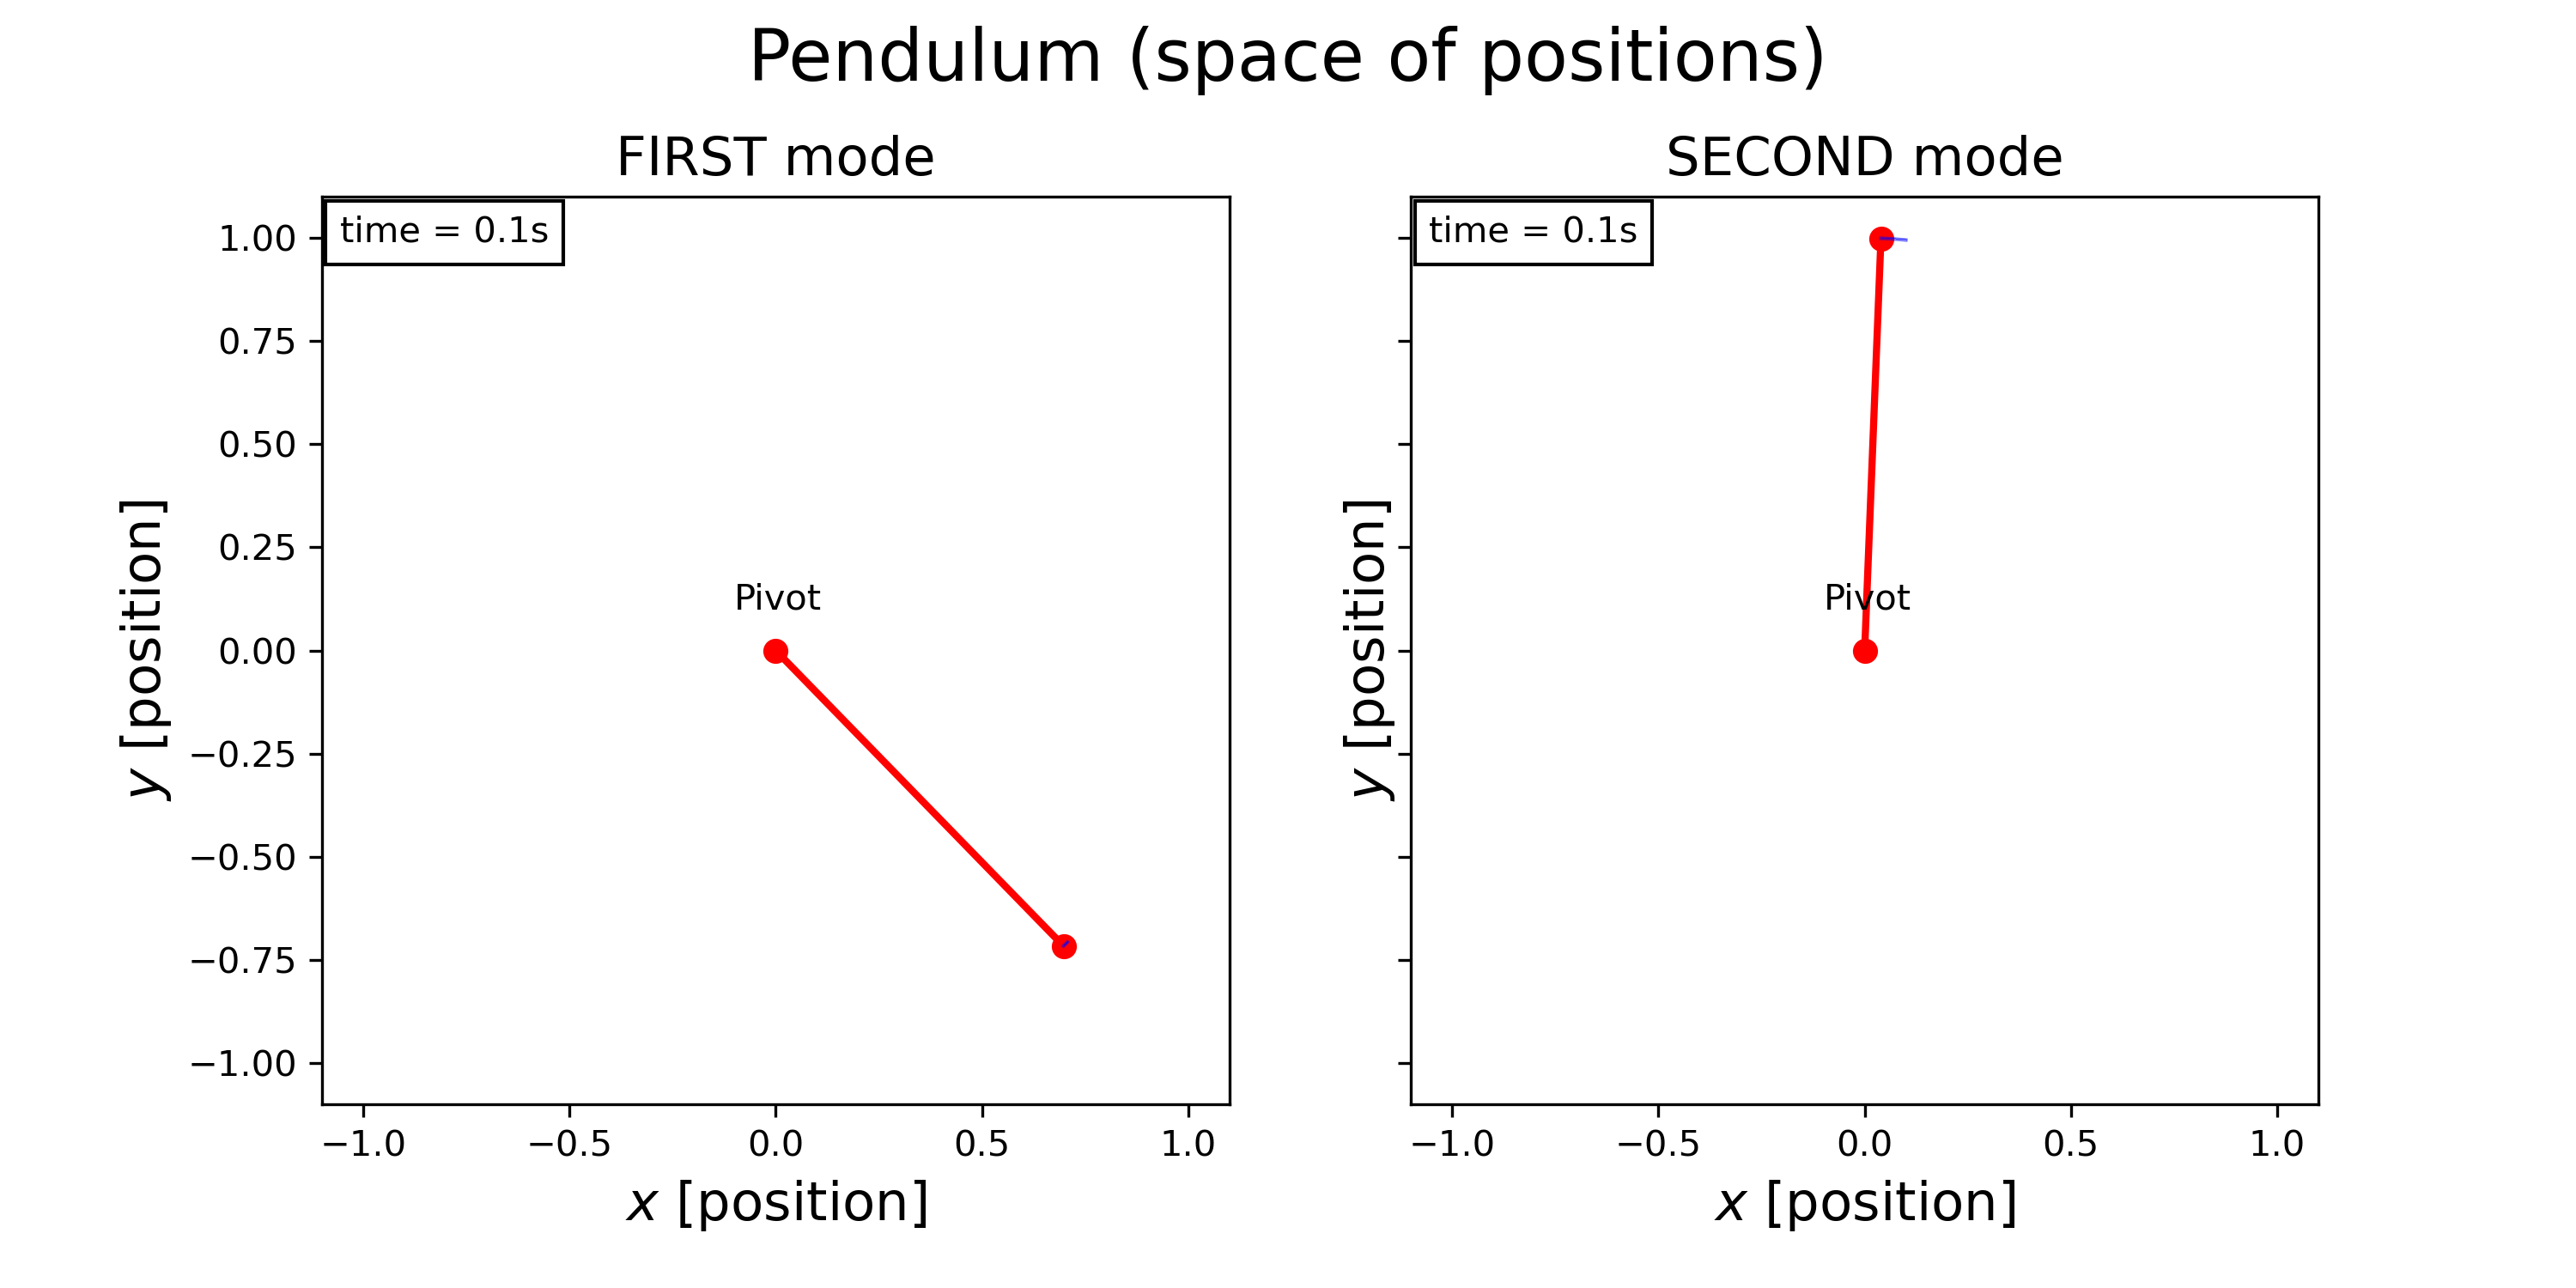

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), dpi=200, sharey=True)

# Customise plot appearance
offset = 0.1*length
for ax in (ax1, ax2):
    ax.set_xlim(-(length+offset), (length+offset))
    ax.set_ylim(-(length+offset), (length+offset))
    ax.set_xlabel("$x$ [position]", fontsize=15)
    ax.set_ylabel("$y$ [position]", fontsize=15)
    ax.set_aspect('equal')
    ax.grid(False)

    ax.text(-0.1,0.1,"Pivot")

    
ax1.set_title("FIRST mode", fontsize=15)
ax2.set_title("SECOND mode", fontsize=15)
fig.suptitle("Pendulum (space of positions)", fontsize=20)
    

line1,  = ax1.plot([], [], 'o-', color="red" , lw=2) # pendulum line
line2,  = ax2.plot([], [], 'o-', color="red" , lw=2) # pendulum line
line    = [line1, line2]

trace1, = ax1.plot([], [], ',-', color="blue", lw=1, alpha=0.5) # trajectory trace
trace2, = ax2.plot([], [], ',-', color="blue", lw=1, alpha=0.5) # trajectory trace
trace   = [trace1, trace2]

time_template = 'time = %.1fs'
time_text1 = ax1.text(0.02, 0.95, '', transform=ax1.transAxes)
time_text2 = ax2.text(0.02, 0.95, '', transform=ax2.transAxes)
time_text1.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black'))
time_text2.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black'))
time_text = [time_text1, time_text2]

history_len = 500  # how many trajectory points to display
history1_x, history1_y = deque(maxlen=history_len), deque(maxlen=history_len)
history2_x, history2_y = deque(maxlen=history_len), deque(maxlen=history_len)

def animate(i):
    
    data1x = [0, solution1_x[i]]
    data1y = [0, solution1_y[i]]

    data2x = [0, solution2_x[i]]
    data2y = [0, solution2_y[i]]

    if i == 0:
        history1_x.clear()
        history1_y.clear()
        history2_x.clear()
        history2_y.clear()

    history1_x.appendleft(data1x[1])
    history1_y.appendleft(data1y[1])

    history2_x.appendleft(data2x[1])
    history2_y.appendleft(data2y[1])

    line[0].set_data(data1x, data1y)
    line[1].set_data(data2x, data2y)
    
    trace[0].set_data(history1_x, history1_y)
    trace[1].set_data(history2_x, history2_y)
    
    time_text[0].set_text(time_template % (i*dt))
    time_text[1].set_text(time_template % (i*dt))
    

    return line, time_text, trace

anim = animation.FuncAnimation(
    fig, animate,len(solutions[0]), interval=dt*1000, blit=True)

f = "./pendulum_positions.mp4" 
writermp4 = animation.FFMpegWriter(fps=200) 
anim.save(f, writer=writermp4)

plt.show()

<IPython.core.display.Javascript object>


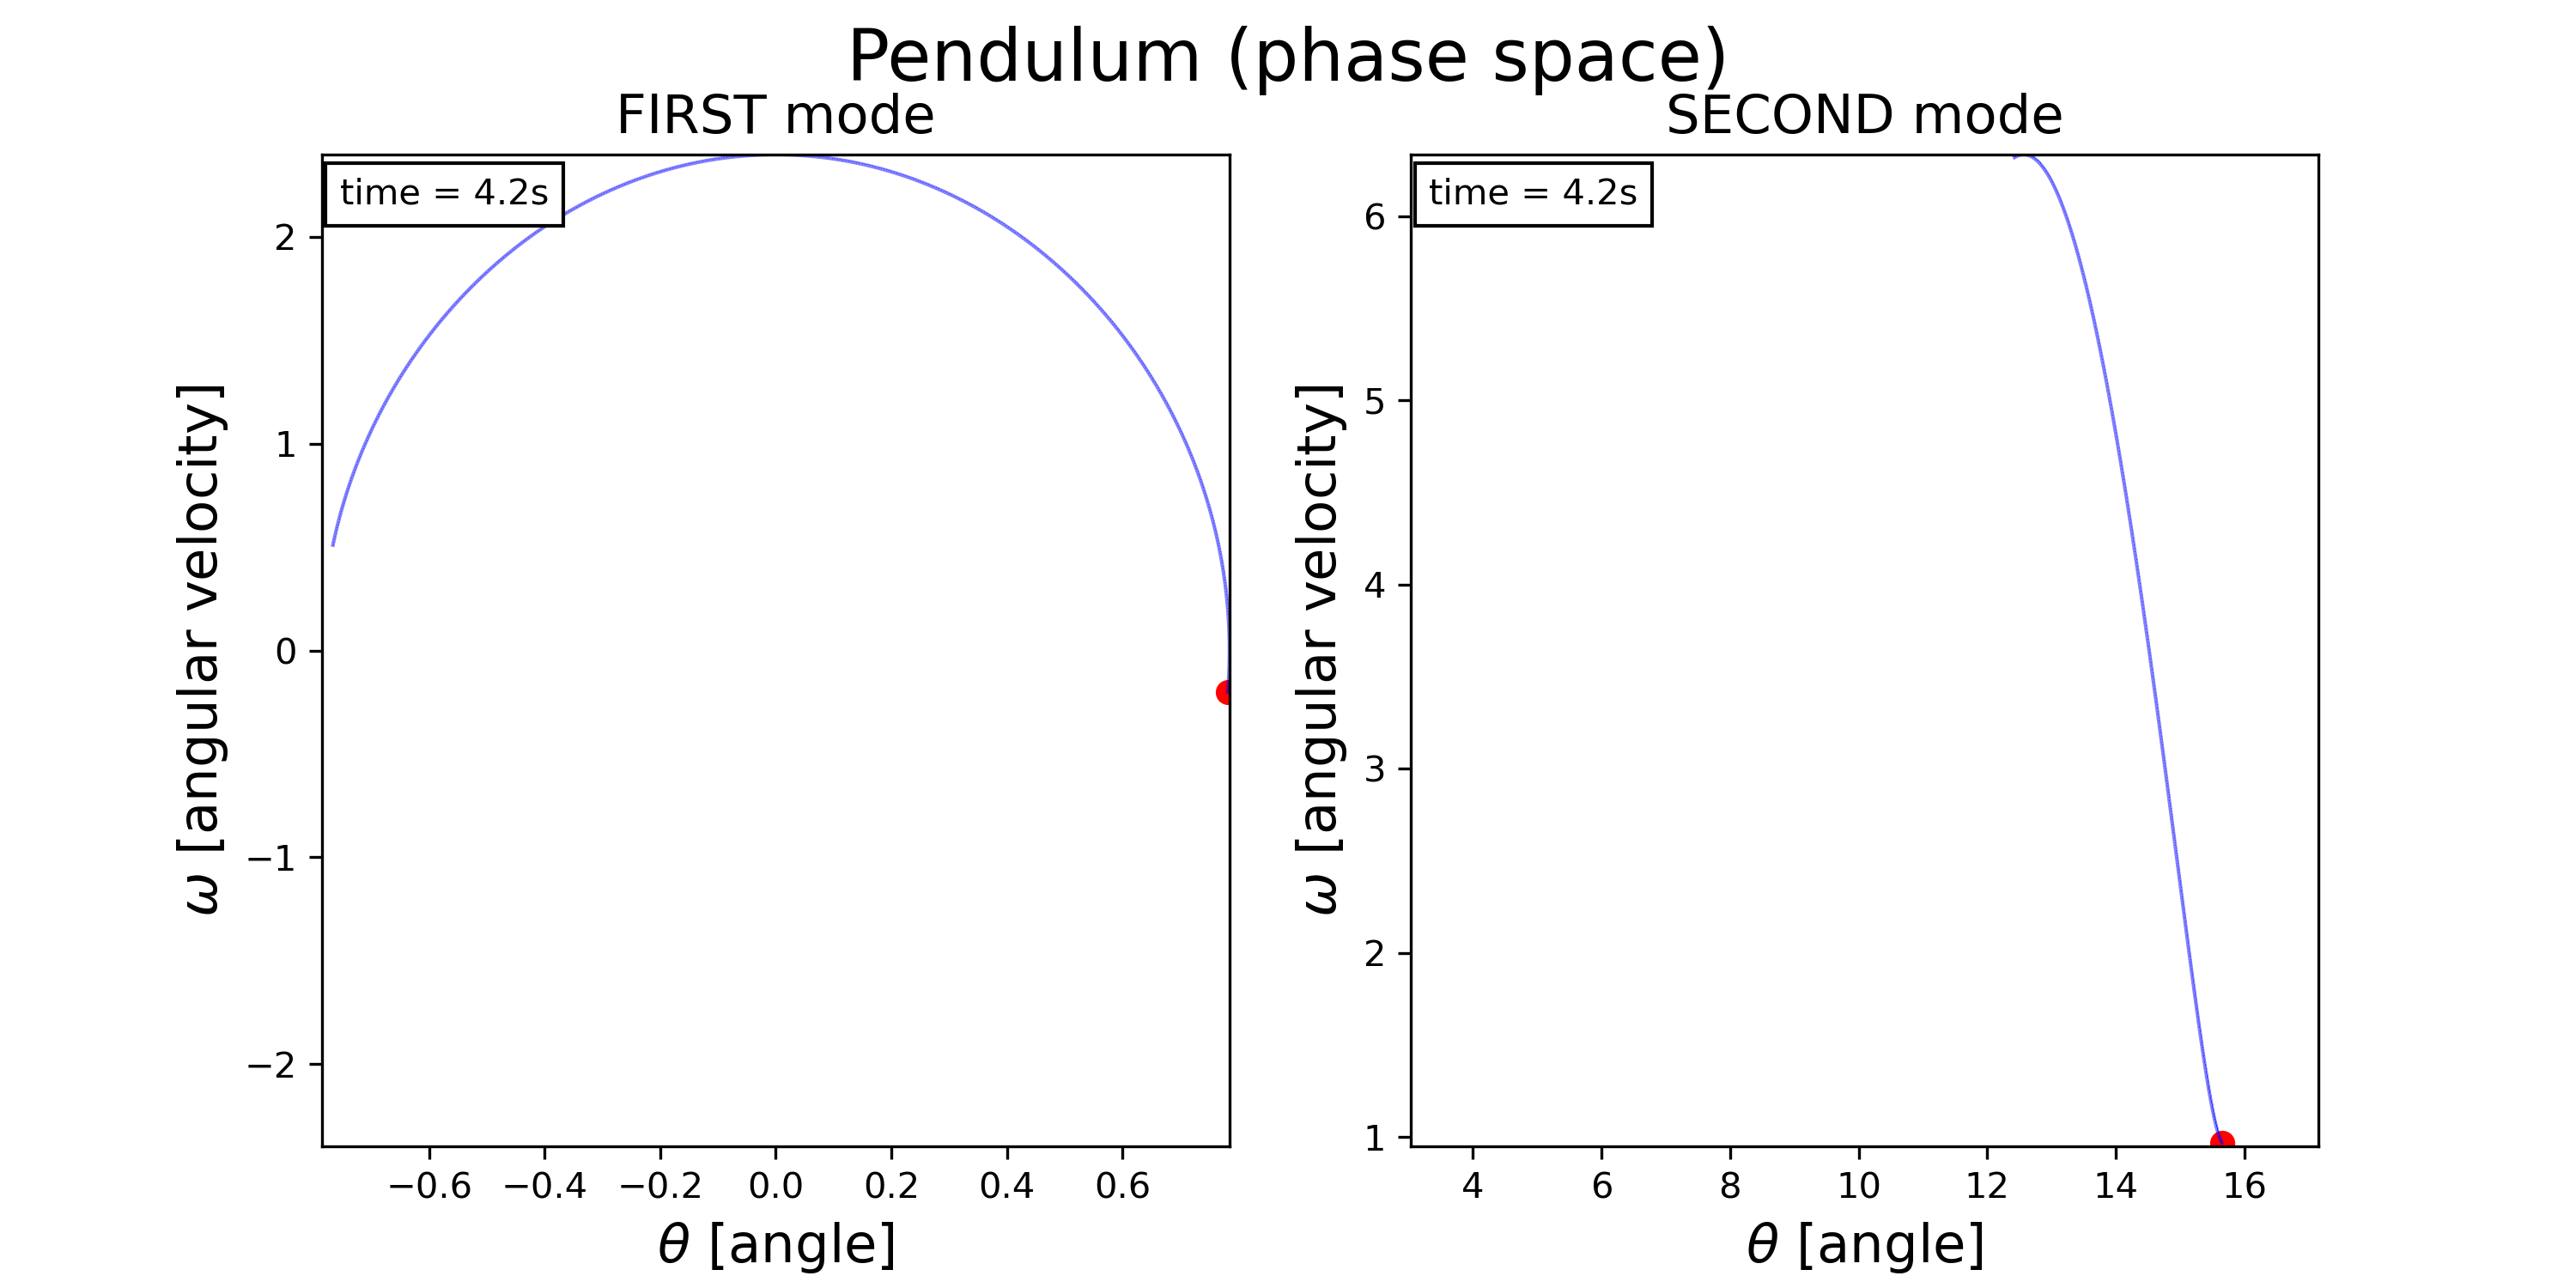

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), dpi=200)

# Customise plot appearance
offset = 0.1*length
for ax in (ax1, ax2):
    ax.set_xlabel("$\\theta$ [angle]", fontsize=15)
    ax.set_ylabel("$\omega$ [angular velocity]" , fontsize=15)
#     ax.set_aspect('equal')
    ax.grid(False)
    
ax1.set_xlim(solution1_theta.min(), solution1_theta.max())
ax1.set_ylim(solution1_omega.min(), solution1_omega.max())
ax2.set_xlim(solution2_theta.min(), solution2_theta.max())
ax2.set_ylim(solution2_omega.min(), solution2_omega.max())
    
ax1.set_title("FIRST mode", fontsize=15)
ax2.set_title("SECOND mode", fontsize=15)
fig.suptitle("Pendulum (phase space)", fontsize=20)
    

line1,  = ax1.plot([], [], 'o', color="red" , lw=2, linestyle="") # pendulum line
line2,  = ax2.plot([], [], 'o', color="red" , lw=2, linestyle="") # pendulum line
line    = [line1, line2]

trace1, = ax1.plot([], [], ',-', color="blue", lw=1, alpha=0.5) # trajectory trace
trace2, = ax2.plot([], [], ',-', color="blue", lw=1, alpha=0.5) # trajectory trace
trace   = [trace1, trace2]


time_template = 'time = %.1fs'
time_text1 = ax1.text(0.02, 0.95, '', transform=ax1.transAxes)
time_text2 = ax2.text(0.02, 0.95, '', transform=ax2.transAxes)
time_text1.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black'))
time_text2.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black'))
time_text = [time_text1, time_text2]

history_len = 500  # how many trajectory points to display
history1_x, history1_y = deque(maxlen=history_len), deque(maxlen=history_len)
history2_x, history2_y = deque(maxlen=history_len), deque(maxlen=history_len)

def animate(i):
    
    data1x = [solution1_theta[i]]
    data1y = [solution1_omega[i]]

    data2x = [solution2_theta[i]]
    data2y = [solution2_omega[i]]

    if i == 0:
        history1_x.clear()
        history1_y.clear()
        history2_x.clear()
        history2_y.clear()

    history1_x.appendleft(data1x[0])
    history1_y.appendleft(data1y[0])

    history2_x.appendleft(data2x[0])
    history2_y.appendleft(data2y[0])

    line[0].set_data(data1x, data1y)
    line[1].set_data(data2x, data2y)
    
    trace[0].set_data(history1_x, history1_y)
    trace[1].set_data(history2_x, history2_y)
    
    time_text[0].set_text(time_template % (i*dt))
    time_text[1].set_text(time_template % (i*dt))
    

    return time_text, trace

anim = animation.FuncAnimation(
    fig, animate,len(solutions[0]), interval=dt*1000, blit=True)

f = "./pendulum_phase_space.mp4" 
writermp4 = animation.FFMpegWriter(fps=200) 
anim.save(f, writer=writermp4)

plt.show()